<a href="https://colab.research.google.com/github/23Tarandeep57/Pytorch_Basics/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.02,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"first 5 samplse of X:\n {X[:5]}")
print(f"first 5 samplse of y:\n {y[:5]}")


first 5 samplse of X:
 [[ 0.76026594  0.22387823]
 [-0.76722217  0.1455425 ]
 [-0.80815854  0.14894355]
 [-0.3760283   0.70320906]
 [ 0.44051035 -0.89761737]]
first 5 samplse of y:
 [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "label" : y})


In [ ]:
circles.head()

,X1,X2,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0


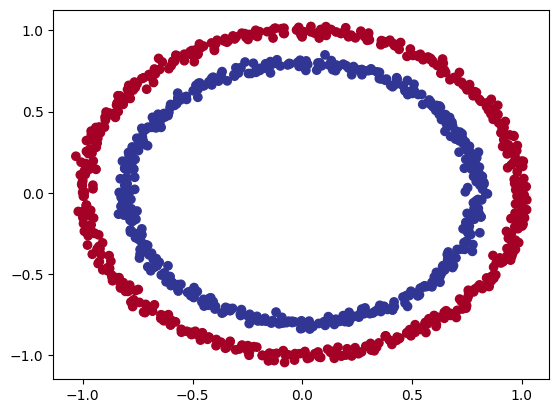

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

# Check input output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
import torch
torch.__version__

'2.9.0+cpu'

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X), X.dtype, type(y) , y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_Train len: {len(X_train)}")
print(f"X_Test len: {len(X_test)}")
print(f"y_train len: {len(y_train)}")
print(f"y_test len: {len(y_test)}")

X_Train len: 800
X_Test len: 200
y_train len: 800
y_test len: 200


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
from torch import nn

In [ ]:
class circle_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=8)
    self.layer2 = nn.Linear(in_features=8, out_features=8)
    self.layer3 = nn.Linear(in_features=8, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_0 = circle_model()
model_0

circle_model(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

# another way to build a neural network

In [ ]:
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_0

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.5190,  0.6415],
                      [ 0.0508,  0.1951],
                      [-0.6714,  0.5389],
                      [-0.3303,  0.3437],
                      [-0.0883,  0.5708],
                      [-0.3710, -0.6716],
                      [-0.0126,  0.2323],
                      [ 0.1844, -0.5726]])),
             ('layer1.bias',
              tensor([ 0.5352,  0.1651, -0.1060, -0.5675, -0.0721, -0.2814,  0.6838, -0.1194])),
             ('layer2.weight',
              tensor([[-0.2691,  0.3052,  0.3052,  0.1205, -0.0277,  0.2956, -0.0817, -0.1831],
                      [-0.1564, -0.0484,  0.1034,  0.3432,  0.3365, -0.0898,  0.0141,  0.1774],
                      [ 0.3160, -0.2181,  0.3372, -0.1799, -0.1576,  0.1700, -0.1073, -0.1769],
                      [-0.2377, -0.1755,  0.0831,  0.2346, -0.2909,  0.0793, -0.1765,  0.2748],
                      [ 0.0600, -0.2174, -0.1170,  0.0441,  0.0093, -0.2382, -0.1201,  0.

In [ ]:
untrained_preds=model_0(X_test.to(device))
print(f"len of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"")

len of predictions: 200, shape: torch.Size([200, 1])



In [ ]:
# loss_fn = nn.BCELoss() # requires input to have already gone through sigmoid activation prior
loss_fn = nn.BCEWithLogitsLoss() # sigmoid already builtin

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))
  return acc

In [ ]:
accuracy_fn(y_test, y_test)

1.0

In [ ]:
train_loss_history = []
test_loss_history = []

In [ ]:
epochs = 2000

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # print(f"shape of y_pred: {y_pred.shape}, shape of y_train: {y_train.shape}")
  loss = loss_fn(y_logits, y_train)
  train_loss_history.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    y_logits_test = model_0(X_test).squeeze()
    y_pred_test = torch.round(torch.sigmoid(y_logits_test))
    loss_test = loss_fn(y_logits_test, y_test)
    test_loss_history.append(loss_test.item())
    if epoch%100 == 0:
      print(f"epoch: {epoch} training loss: {loss}")
      print(f"train accuracy: {accuracy_fn(y_train, y_pred):.4f}")
      print(f"epoch: {epoch} testing loss: {loss_test}")
      print(f"test accuracy: {accuracy_fn(y_test, y_pred_test):.4f}")
model_0.state_dict()

epoch: 0 training loss: 0.693267822265625
train accuracy: 0.5000
epoch: 0 testing loss: 0.6932722330093384
test accuracy: 0.5000
epoch: 100 training loss: 0.692426323890686
train accuracy: 0.5188
epoch: 100 testing loss: 0.692527174949646
test accuracy: 0.5050
epoch: 200 training loss: 0.6916053891181946
train accuracy: 0.5325
epoch: 200 testing loss: 0.691851019859314
test accuracy: 0.5150
epoch: 300 training loss: 0.6905770897865295
train accuracy: 0.6162
epoch: 300 testing loss: 0.6909730434417725
test accuracy: 0.6100
epoch: 400 training loss: 0.689139187335968
train accuracy: 0.5875
epoch: 400 testing loss: 0.6896833777427673
test accuracy: 0.5800
epoch: 500 training loss: 0.6869406700134277
train accuracy: 0.5825
epoch: 500 testing loss: 0.6876586079597473
test accuracy: 0.5700
epoch: 600 training loss: 0.6840541958808899
train accuracy: 0.5800
epoch: 600 testing loss: 0.6850921511650085
test accuracy: 0.5750
epoch: 700 training loss: 0.6803193092346191
train accuracy: 0.5737
epo

OrderedDict([('layer1.weight',
              tensor([[-1.5131, -0.1129],
                      [ 0.3841, -0.1651],
                      [-1.3614,  1.5257],
                      [-0.3303,  0.3437],
                      [ 0.3610,  1.7446],
                      [-2.1930, -1.7570],
                      [ 0.9919,  0.0545],
                      [ 1.0635, -1.6606]])),
             ('layer1.bias',
              tensor([ 1.6885,  0.6120, -0.2665, -0.5675, -0.1073, -0.1324,  1.0238, -0.7864])),
             ('layer2.weight',
              tensor([[-0.2691,  0.3052,  0.3052,  0.1205, -0.0277,  0.2956, -0.0817, -0.1831],
                      [-0.6890,  0.0922,  0.2724,  0.3432,  0.9320,  0.1410,  0.4394,  0.6291],
                      [ 0.0812, -0.5801,  1.6800, -0.1799,  0.7188,  1.6820, -1.0789,  0.0951],
                      [-0.2377, -0.1755,  0.0831,  0.2346, -0.2909,  0.0793, -0.1765,  0.2748],
                      [ 0.0600, -0.2174, -0.1170,  0.0441,  0.0093, -0.2382, -0.1201,  0.

In [ ]:
import numpy as np
def plot_decision_boundary(model, x, y, resolution=0.02):
  x_min = x[:,0].min()-0.5
  x_max = x[:,0].max()+0.5
  y_min = x[:,1].min()-0.5
  y_max = x[:,1].max()+0.5

  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, resolution),
      np.arange(y_min, y_max, resolution)
  )

  grid = np.c_[xx.ravel(), yy.ravel()]
  tensor_grid = torch.from_numpy(grid)
  tensor_grid_float = tensor_grid.type(torch.float)
  with torch.inference_mode():
    Z = model(tensor_grid_float)
    Z = torch.round(torch.sigmoid(Z))
  Z = Z.reshape(xx.shape).numpy()
  plt.figure(figsize = (6,6))
  plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
  plt.scatter(x[:,0],x[:,1],c=y,cmap='coolwarm',edgecolor='k',s=20)
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.title(type(model).__name__)
  plt.show()


/tmp/ipython-input-1143085443.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(x_min, x_max, resolution),
/tmp/ipython-input-1143085443.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, resolution)


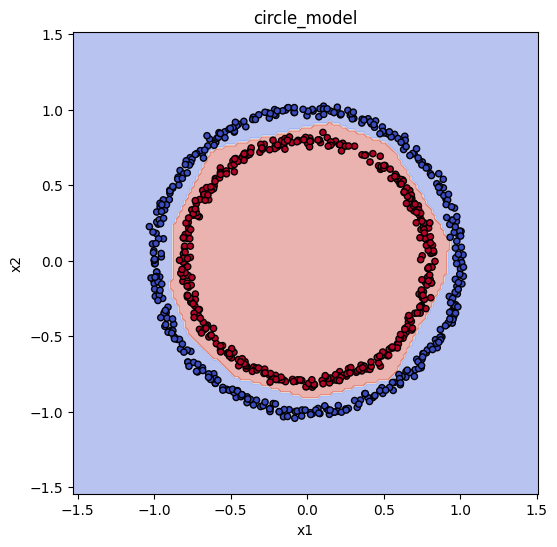

In [ ]:
plot_decision_boundary(model_0, X_train, y_train)

# Multi class categorization

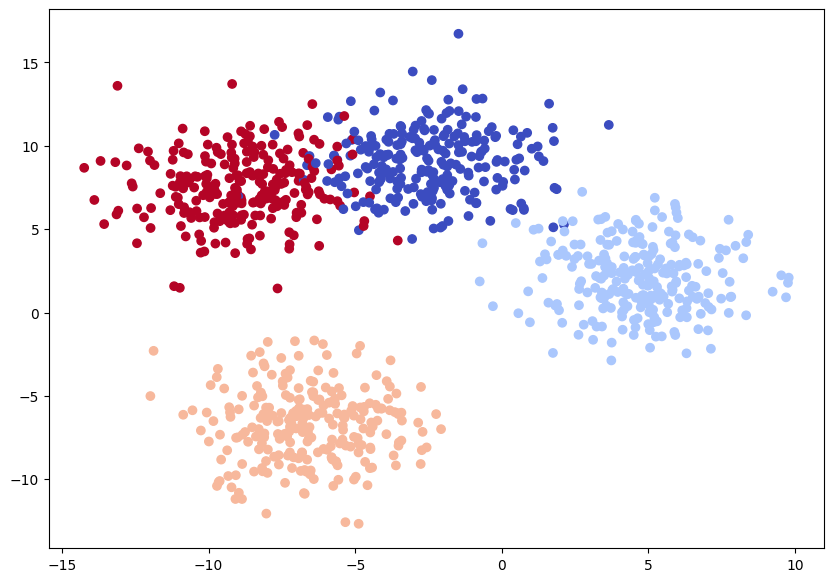

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

num_classes = 4
num_features = 2
random_seed = 42

x_blob, y_blob = make_blobs(
    n_samples = 1000,
    n_features = num_features,
    centers = num_classes,
    cluster_std = 2,
    random_state=random_seed
)
X_train, X_test, y_train, y_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state = random_seed)

plt.figure(figsize=(10, 7))
plt.scatter(x_blob[:,0], x_blob[:,1], c = y_blob, cmap='coolwarm')

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
import pandas as pd
y_train = pd.get_dummies(y_train, dtype=float)
y_test = pd.get_dummies(y_test, dtype=float)
y_train

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
795,0.0,1.0,0.0,0.0
796,0.0,1.0,0.0,0.0
797,1.0,0.0,0.0,0.0
798,0.0,0.0,1.0,0.0


In [ ]:
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)

In [ ]:
type(y_train), type(y_test), y_train.shape, y_test.shape

(torch.Tensor, torch.Tensor, torch.Size([800, 4]), torch.Size([200, 4]))

In [ ]:
X_train = X_train.type(torch.float)
X_test = X_test.type(torch.float)
y_test = y_test.type(torch.float)
y_train = y_train.type(torch.float)

In [ ]:
class blob_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=8)
    self.layer2 = nn.Linear(in_features=8, out_features=64)
    self.layer3 = nn.Linear(in_features=64, out_features=8)
    self.layer4 = nn.Linear(in_features=8, out_features=4)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax(dim=1)

  def forward(self, x : torch.Tensor):
    z = self.relu(self.layer1(x))
    z = self.relu(self.layer2(z))
    z = self.relu(self.layer3(z))
    return self.softmax(self.layer4(z))

model_1 = blob_model()
model_1

blob_model(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=8, bias=True)
  (layer4): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.4158,  0.3838],
                      [-0.0996, -0.4416],
                      [-0.5076,  0.6042],
                      [ 0.6196,  0.2200],
                      [-0.0587, -0.4815],
                      [-0.1078,  0.2807],
                      [ 0.2790, -0.2424],
                      [-0.5657,  0.4204]])),
             ('layer1.bias',
              tensor([ 0.3926,  0.1482,  0.4406,  0.1472, -0.2111, -0.0061,  0.4656, -0.2620])),
             ('layer2.weight',
              tensor([[-0.2048,  0.2549,  0.1251, -0.3192, -0.3296,  0.3374,  0.2263,  0.0187],
                      [-0.0413, -0.3445,  0.1696, -0.1767, -0.3094, -0.2438,  0.0614, -0.2473],
                      [-0.0926, -0.3342, -0.1589, -0.1371,  0.0675,  0.0966, -0.2363,  0.2525],
                      [-0.1539, -0.2149, -0.0433,  0.2905,  0.1215, -0.1556, -0.3231,  0.1514],
                      [ 0.1582, -0.3008, -0.3431,  0.3171, -0.0299,  0.2502, -0.0944, -0.

In [ ]:
def accuracy_fn(y_pred, y_true):
  y_labels = torch.argmax(y_pred, dim=1)
  y_true_labels = torch.argmax(y_true, dim=1)
  correct = torch.eq(y_labels, y_true_labels).sum().item()
  acc = correct/len(y_pred)
  return acc

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)


In [ ]:
train_loss_history=[]
test_loss_history=[]

In [ ]:
epochs = 500

for epoch in range(epochs):
  model_1.train()
  y_preds = model_1(X_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  train_loss_history.append(loss.item())

  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    y_preds_test = model_1(X_test)
    test_loss = loss_fn(y_preds_test, y_test)
    test_loss_history.append(test_loss.item())
    if epoch%100 == 0:
      print(f"epoch : {epoch}| Train Loss: {loss:.4f}| Test loss: {test_loss:.4f}| Train acc: {accuracy_fn(y_preds,y_train):.4f}| Test acc: {accuracy_fn(y_preds_test,y_test):.4f}")


epoch : 0| Train Loss: 1.4000| Test loss: 1.3689| Train acc: 0.2512| Test acc: 0.2850
epoch : 100| Train Loss: 0.8480| Test loss: 0.8373| Train acc: 0.9563| Test acc: 0.9650
epoch : 200| Train Loss: 0.7894| Test loss: 0.7843| Train acc: 0.9600| Test acc: 0.9650
epoch : 300| Train Loss: 0.7855| Test loss: 0.7814| Train acc: 0.9600| Test acc: 0.9600
epoch : 400| Train Loss: 0.7839| Test loss: 0.7804| Train acc: 0.9600| Test acc: 0.9600


In [ ]:
import numpy as np
def plot_decision_boundary(model, x, y, resolution=0.02):
  x_min = x[:,0].min()-0.5
  x_max = x[:,0].max()+0.5
  y_min = x[:,1].min()-0.5
  y_max = x[:,1].max()+0.5

  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, resolution),
      np.arange(y_min, y_max, resolution)
  )

  grid = np.c_[xx.ravel(), yy.ravel()]
  tensor_grid = torch.from_numpy(grid)
  tensor_grid_float = tensor_grid.type(torch.float)
  with torch.inference_mode():
    Z = model(tensor_grid_float)
    Z = torch.argmax(Z, dim=1)
  Z = Z.reshape(xx.shape).numpy()
  plt.figure(figsize = (6,6))
  plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
  plt.scatter(x[:,0],x[:,1],c=torch.argmax(y,dim=1),cmap='coolwarm',edgecolor='k',s=20)
  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.title(type(model).__name__)
  plt.show()


/tmp/ipython-input-1937031855.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(x_min, x_max, resolution),
/tmp/ipython-input-1937031855.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  np.arange(y_min, y_max, resolution)


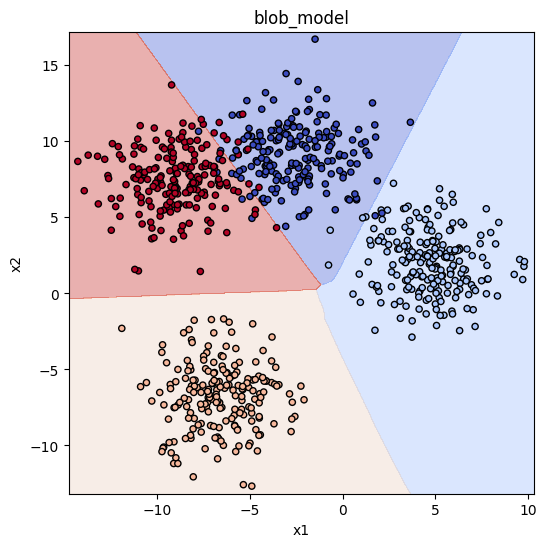

In [ ]:
plot_decision_boundary(model_1, X_train, y_train)

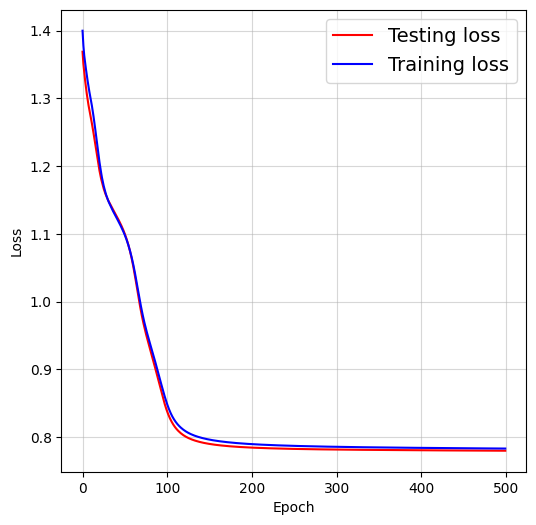

In [ ]:
def plot_loss_curves(train_loss_history, test_loss_history):
  plt.figure(figsize=(6,6))
  plt.plot(np.arange(len(test_loss_history)), test_loss_history, label = "Testing loss", c = 'r')
  plt.plot(np.arange(len(train_loss_history)), train_loss_history, label = "Training loss", c = 'b')
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(prop={"size": 14})
  plt.grid(True, alpha=0.5)

  plt.show()

plot_loss_curves(train_loss_history, test_loss_history)